In [1]:
!pip install nltk
!python -m nltk.downloader punkt

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import re

import imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

import transformers
from transformers import BertTokenizer, BertModel, TFBertForSequenceClassification

import torch

from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/WordsofWar')
from BertSeqVect import BertSequenceVectorizer

from tqdm import tqdm
# Enable tqdm progress bars on pandas
tqdm.pandas()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("presidential_speeches.csv", encoding = "ISO-8859-1", usecols=['Date', 'President', 'Party', 'Transcript'])

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [5]:
df.head()

,Date,President,Party,Transcript
0,1789-04-30,George Washington,Unaffiliated,Fellow Citizens of the Senate and the House of...
1,1789-10-03,George Washington,Unaffiliated,Whereas it is the duty of all Nations to ackno...
2,1790-01-08,George Washington,Unaffiliated,Fellow Citizens of the Senate and House of Rep...
3,1790-12-08,George Washington,Unaffiliated,Fellow citizens of the Senate and House of Rep...
4,1790-12-29,George Washington,Unaffiliated,"I the President of the United States, by my ow..."


In [6]:
df.isnull().sum()

Date          0
President     0
Party         0
Transcript    1
dtype: int64

In [7]:
null_transcript_rows = df[df['Transcript'].isnull()]

print(null_transcript_rows)

         Date         President                  Party Transcript
52 1808-11-08  Thomas Jefferson  Democratic-Republican        NaN


#### The dataset contained a missing value for a speech by Thomas Jefferson on 11/08/1808, we filled this in by finding it from the source:

https://millercenter.org/the-presidency/presidential-speeches/november-8-1808-eighth-annual-message

In [8]:
TJ_18081108_transcript = "It would have been a source, fellow citizens, of much gratification, if our last communications from Europe had enabled me to inform you that the belligerent nations, whose disregard of neutral rights has been so destructive to our commerce, had become awakened to the duty and true policy of revoking their unrighteous edicts. That no means might be omitted to produce this salutary effect, I lost no time in availing myself of the act authorizing a suspension, in whole or in part, of the several embargo laws. Our ministers at London and Paris were instructed to explain to the respective governments there, our disposition to exercise the authority in such manner as would withdraw the pretext on which the aggressions were originally founded, and open a way for a renewal of that commercial intercourse which it was alleged on all sides had been reluctantly obstructed. As each of those governments had pledged its readiness to concur in renouncing a measure which reached its adversary through the incontestable rights of neutrals only, and as the measure had been assumed by each as a retaliation for an asserted acquiescence in the aggressions of the other, it was reasonably expected that the occasion would have been seized by both for evincing the sincerity of their profession, and for restoring to the commerce of the United States its legitimate freedom. The instructions to our ministers with respect to the different belligerents were necessarily modified with reference to their different circumstances, and to the condition annexed by law to the executive power of suspension, requiring a degree of security to our commerce which would not result from a repeal of the decrees of France. Instead of a pledge, therefore, of a suspension of the embargo as to her in case of such a repeal, it was presumed that a sufficient inducement might be found in other considerations, and particularly in the change produced by a compliance with our just demands by one belligerent, and a refusal by the other, in the relations between the other and the United States. To Great Britain, whose power on the ocean is so ascendant, it was deemed not inconsistent with that condition to state explicitly, that on her rescinding her orders in relation to the United States their trade would be opened with her, and remain shut to her enemy, in case of his failure to rescind his decrees also. From France no answer has been received, nor any indication that the requisite change in her decrees is contemplated. The favorable reception of the proposition to Great Britain was the less to be doubted, as her orders of council had not only been referred for their vindication to an acquiescence on the part of the United States no longer to be pretended, but as the arrangement proposed, while it resisted the illegal decrees of France, involved, moreover, substantially, the precise advantages professedly aimed at by the British orders. The arrangement has nevertheless been rejected.This candid and liberal experiment having thus failed, and no other event having occurred on which a suspension of the embargo by the executive was authorized, it necessarily remains in the extent originally given to it. We have the satisfaction, however, to reflect, that in return for the privations by the measure, and which our fellow citizens in general have borne with patriotism, it has had the important effects of saving our mariners and our vast mercantile property, as well as of affording time for prosecuting the defensive and provisional measures called for by the occasion. It has demonstrated to foreign nations the moderation and firmness which govern our councils, and to our citizens the necessity of uniting in support of the laws and the rights of their country, and has thus long frustrated those usurpations and spoliations which, if resisted, involve war; if submitted to, sacrificed a vital principle of our national independence.Under a continuance of the belligerent measures which, in defiance of laws which consecrate the rights of neutrals, overspread the ocean with danger, it will rest with the wisdom of Congress to decide on the course best adapted to such a state of things; and bringing with them, as they do, from every part of the Union, the sentiments of our constituents, my confidence is strengthened, that in forming this decision they will, with an unerring regard to the essential rights and interests of the nation, weigh and compare the painful alternatives out of which a choice is to be made. Nor should I do justice to the virtues which on other occasions have marked the character of our fellow citizens, if I did not cherish an equal confidence that the alternative chosen, whatever it may be, will be maintained with all the fortitude and patriotism which the crisis ought to inspire.The documents containing the correspondences on the subject of the foreign edicts against our commerce, with the instructions given to our ministers at London and Paris, are now laid before you.The communications made to Congress at their last session explained the posture in which the close of the discussion relating to the attack by a British ship of war on the frigate Chesapeake left a subject on which the nation had manifested so honorable a sensibility. Every view of what had passed authorized a belief that immediate steps would be taken by the British government for redressing a wrong, which, the more it was investigated, appeared the more clearly to require what had not been provided for in the special mission. It is found that no steps have been taken for the purpose. On the contrary, it will be seen, in the documents laid before you, that the inadmissible preliminary which obstructed the adjustment is still adhered to; and, moreover, that it is now brought into connection with the distinct and irrelative case of the orders in council. The instructions which had been given to our ministers at London with a view to facilitate, if necessary, the reparation claimed by the United States, are included in the documents communicated.Our relations with the other powers of Europe have undergone no material changes since your last session. The important negotiations with Spain, which had been alternately suspended and resumed, necessarily experience a pause under the extraordinary and interesting crisis which distinguished her internal situation.With the Barbary powers we continue in harmony, with the exception of an unjustifiable proceeding of the dey of Algiers toward our consul to that regency. Its character and circumstances are now laid before you, and will enable you to decide how far it may, either now or hereafter, call for any measures not within the limits of the executive authority.With our Indian neighbors the public peace has been steadily maintained. Some instances of individual wrong have, as at other times, taken place, but in nowise implicating the will of the nation. Beyond the Mississippi, the Iowas, the Sacs, and the Alabamas, have delivered up for trial and punishment individuals from among themselves accused of murdering citizens of the United States. On this side of the Mississippi, the Creeks are exerting themselves to arrest offenders of the same kind; and the Choctaws have manifested their readiness and desire for amicable and just arrangements respecting depredations committed by disorderly persons of their tribe. And, generally, from a conviction that we consider them as part of ourselves, and cherish with sincerity their rights and interests, the attachment of the Indian tribes is gaining strength daily -- is extending from the nearer to the more remote, and will amply requite us for the justice and friendship practised towards them. Husbandry and household manufacture are advancing among them, more rapidly with the southern than the northern tribes, from circumstances of soil and climate; and one of the two great divisions of the Cherokee nation have now under consideration to solicit the citizenship of the United States, and to be identified with us in laws and government, in such progressive manner as we shall think best.In consequence of the appropriations of the last session of Congress for the security of our seaport towns and harbors, such works of defence have been erected as seemed to be called for by the situation of the several places, their relative importance, and the scale of expense indicated by the amount of the appropriation. These works will chiefly be finished in the course of the present season, except at New York and New Orleans, where most was to be done; and although a great proportion of the last appropriation has been expended on the former place, yet some further views will be submitted by Congress for rendering its security entirely adequate against naval enterprise. A view of what has been done at the several places, and of what is proposed to be done, shall be communicated as soon as the several reports are received.Of the gun-boats authorized by the act of December last, it has been thought necessary to build only one hundred and three in the present year. These, with those before possessed, are sufficient for the harbors and waters exposed, and the residue will require little time for their construction when it is deemed necessary.Under the act of the last session for raising an additional military force, so many officers were immediately appointed as were necessary for carrying on the business of recruiting, and in proportion as it advanced, others have been added. We have reason to believe their success has been satisfactory, although such returns have not yet been received as enable me to present to you a statement of the numbers engaged.I have not thought it necessary in the course of the last season to call for any general detachments of militia or volunteers under the law passed for that purpose. For the ensuing season, however, they will require to be in readiness should their services be wanted. Some small and special detachments have been necessary to maintain the laws of embargo on that portion of our northern frontier which offered peculiar facilities for evasion, but these were replaced as soon as it could be done by bodies of new recruits. By the aid of these, and of the armed vessels called into actual service in other quarters, the spirit of disobedience and abuse which manifested itself early, and with sensible effect while we were unprepared to meet it, has been considerably repressed.Considering the extraordinary character of the times in which we live, our attention should unremittingly be fixed on the safety of our country. For a people who are free, and who mean to remain so, a well-organized and armed militia is their best security. It is, therefore, incumbent on us, at every meeting, to revise the condition of the militia, and to ask ourselves if it is prepared to repel a powerful enemy at every point of our territories exposed to invasion. Some of the States have paid a laudable attention to this object; but every degree of neglect is to be found among others. Congress alone have power to produce a uniform state of preparation in this great organ of defence; the interests which they so deeply feel in their own and their country's security will present this as among the most important objects of their deliberation.Under the acts of March 11th and April 23d, respecting arms, the difficulty of procuring them from abroad, during the present situation and dispositions of Europe, induced us to direct our whole efforts to the means of internal supply. The public factories have, therefore, been enlarged, additional machineries erected, and in proportion as artificers can be found or formed, their effect, already more than doubled, may be increased so as to keep pace with the yearly increase of the militia. The annual sums appropriated by the latter act, have been directed to the encouragement of private factories of arms, and contracts have been entered into with individual undertakers to nearly the amount of the first year's appropriation.The suspension of our foreign commerce, produced by the injustice of the belligerent powers, and the consequent losses and sacrifices of our citizens, are subjects of just concern. The situation into which we have thus been forced, has impelled us to apply a portion of our industry and capital to internal manufactures and improvements. The extent of this conversion is daily increasing, and little doubt remains that the establishments formed and forming will -- under the auspices of cheaper materials and subsistence, the freedom of labor from taxation with us, and of protecting duties and prohibitions -- become permanent. The commerce with the Indians, too, within our own boundaries, is likely to receive abundant aliment from the same internal source, and will secure to them peace and the progress of civilization, undisturbed by practices hostile to both.The accounts of the receipts and expenditures during the year ending on the 30th day of September last, being not yet made up, a correct statement will hereafter be transmitted from the Treasury. In the meantime, it is ascertained that the receipts have amounted to near eighteen millions of dollars, which, with the eight millions and a half in the treasury at the beginning of the year, have enabled us, after meeting the current demands and interest incurred, to pay two millions three hundred thousand dollars of the principal of our funded debt, and left us in the treasury, on that day, near fourteen millions of dollars. Of these, five millions three hundred and fifty thousand dollars will be necessary to pay what will be due on the first day of January next, which will complete the reimbursement of the eight per cent. stock. These payments, with those made in the six years and a half preceding, will have extinguished thirty-three millions five hundred and eighty thousand dollars of the principal of the funded debt, being the whole which could be paid or purchased within the limits of the law and our contracts; and the amount of principal thus discharged will have liberated the revenue from about two millions of dollars of interest, and added that sum annually to the disposable surplus. The probable accumulation of the surpluses of revenue beyond what can be applied to the payment of the public debt, whenever the freedom and safety of our commerce shall be restored, merits the consideration of Congress. Shall it lie unproductive in the public vaults? Shall the revenue be reduced? Or shall it rather be appropriated to the improvements of roads, canals, rivers, education, and other great foundations of prosperity and union, under the powers which Congress may already possess, or such amendment of the constitution as may be approved by the States? While uncertain of the course of things, the time may be advantageously employed in obtaining the powers necessary for a system of improvement, should that be thought best.Availing myself of this the last occasion which will occur of addressing the two houses of the legislature at their meeting, I cannot omit the expression of my sincere gratitude for the repeated proofs of confidence manifested to me by themselves and their predecessors since my call to the administration, and the many indulgences experienced at their hands. The same grateful acknowledgments are due to my fellow citizens generally, whose support has been my great encouragement under all embarrassments. In the transaction of their business I cannot have escaped error. It is incident to our imperfect nature. But I may say with truth, my errors have been of the understanding, not of intention; and that the advancement of their rights and interests has been the constant motive for every measure. On these considerations I solicit their indulgence. Looking forward with anxiety to their future destinies, I trust that, in their steady character unshaken by difficulties, in their love of liberty, obedience to law, and support of the public authorities, I see a sure guaranty of the permanence of our republic; and retiring from the charge of their affairs, I carry with me the consolation of a firm persuasion that Heaven has in store for our beloved country long ages to come of prosperity and happiness."

In [9]:
df['Transcript'].fillna(TJ_18081108_transcript, inplace=True)

In [10]:
df.isnull().sum()

Date          0
President     0
Party         0
Transcript    0
dtype: int64

In [11]:
df_wars = pd.DataFrame({
    'War_Name': ['First Barbary Wars',
                 'War of 1812',
                 'Indian Wars',
                 'Mexican-American War',
                 'Spanish-American War',
                 'Mexican Border Wars',
                 'World War 1',
                 'World War 2',
                 'Korean War',
                 'Vietnam War',
                 'Persian Gulf War',
                 'OEF',
                 'OFS',
                 'OES',
                 'OIF',
                 'OND',
                 'OIR'
                ],
    'Start_Date': ['1801-05-01',
                   '1812-06-18',
                   '1817-01-01',
                   '1846-04-25',
                   '1898-04-21',
                   '1916-05-09',
                   '1917-04-06',
                   '1941-12-07',
                   '1950-06-25',
                   '1964-08-05',
                   '1990-08-02',
                   '2001-10-07',
                   '2015-01-01',
                   '2021-10-01',
                   '2003-03-17',
                   '2010-11-01',
                   '2014-10-15'
                  ],
    'End_Date': ['1805-06-10',
                 '1815-02-18',
                 '1898-12-31',
                 '1848-02-02',
                 '1903-07-15',
                 '1917-04-05',
                 '1918-11-11',
                 '1946-12-31',
                 '1955-01-31',
                 '1975-05-07',
                 '1991-04-06',
                 '2014-12-28',
                 '2021-08-31',
                 '2024-02-20',
                 '2010-08-31',
                 '2011-12-15',
                 '2024-02-20'
                ],
})

df_wars['Start_Date'] = pd.to_datetime(df_wars['Start_Date'], format='%Y-%m-%d')
df_wars['End_Date'] = pd.to_datetime(df_wars['End_Date'], format='%Y-%m-%d')

In [12]:
# Filter speeches df for Date > 1800
df = df[df['Date'] >= ('1800-01-01')].copy()

In [13]:
# Create a new column called "War" in df and initialize it with zeros
df['War'] = 0

# Iterate over each row in df
for index, row in df.iterrows():
    # Get the current date from the row
    current_date = row['Date']

    # Check if the current date falls within 6 months before the start date of any war in df_wars
    for _, war_row in df_wars.iterrows():
        start_date = war_row['Start_Date']

        # Calculate 1yr before the start date of the war
        six_months_before = start_date - pd.DateOffset(years=1)

        # If the current date falls 1 year before the start date of the war, set "War" column to 1
        if current_date >= six_months_before and current_date <= start_date:
            df.at[index, 'War'] = 1
            break

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 28 to 991
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        964 non-null    datetime64[ns]
 1   President   964 non-null    object        
 2   Party       964 non-null    object        
 3   Transcript  964 non-null    object        
 4   War         964 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 77.5+ KB


---

In [15]:
 # Clean transcript for President's name (when POTUS is author)
def clean_transcript(row):
    '''
    Clean transcripts by removing instances of the president's name, floating point numbers, and punctuation.

    Parameters
    ----------
    row : pandas.Series
        A row from the DataFrame containing 'President' and 'Transcript' columns.

    Returns
    -------
    str
        The cleaned transcript with instances of the president's name, floats, and punctuation removed.

    Notes
    -----
    This function iterates over each row in the DataFrame and removes the president's
    name from the transcript text. It converts both the president's name and the transcript
    text to lowercase to ensure case-insensitive matching.
    '''
    president = row['President'].lower()
    transcript = str(row['Transcript'])

    # Remove floating-point numbers and integers
    transcript = re.sub(r'\b\d+(?:\.\d+)?\s+', '', transcript)

    # Convert transcript to lowercase
    transcript = transcript.lower()

    # Remove president's name
    transcript = transcript.replace(president, '').strip()

    # Remove punctuation using regular expressions
    transcript = re.sub(r'[^\w\s]', '', transcript)

    # Tokenize transcript
    tokens = word_tokenize(transcript)

    # Join tokens back into a string
    cleaned_transcript = ' '.join(tokens)

    return cleaned_transcript

# Apply the cleaning function to each row
df['Transcript'] = df.apply(clean_transcript, axis=1)

In [16]:
df.head(2)

,Date,President,Party,Transcript,War
28,1800-05-21,John Adams,Federalist,whereas the late wicked and treasonable insurr...,1
29,1800-11-22,John Adams,Federalist,gentlemen of the senate and gentlemen of the h...,1


In [ ]:
# Save to new csv for later use
#df.to_csv('Speeches_War_Clean.csv', index=False)

---

# Class Imbalance

In [17]:
old_class_counts = df['War'].value_counts()
print(old_class_counts)

0    883
1     81
Name: War, dtype: int64


### Vectorization: Applying the vectorize method from the `BertSequenceVectorizer` class to each speech to convert them into fixed-length vectors.

Instantiate BERT tokenizer and model:

In [18]:
# Instantiate BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Process each transcript using the BERT-large-uncased model to obtain a fixed-length vector representation by using the `BertSequenceVectorizer` class (see BertSeqVect.py).

The resulting vectors are stored in `df` in the `ts_feature` column.

In [19]:
vectorizer = BertSequenceVectorizer()

# Apply BERT sequence vectorization to transcripts
df['ts_feature'] = df['Transcript'].progress_apply(lambda x: vectorizer.vectorize(x))

100%|██████████| 964/964 [01:48<00:00,  8.86it/s]


In [20]:
print((df['ts_feature']).shape)

(964,)


In [21]:
# Extract features from 'ts_feature'
X = np.stack(df['ts_feature'].values)

### Resampling pipeline:

Apply SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance. This effectively oversamples the minority class (`War=1`, in this case) to balance the class distribution. The original paper on SMOTE suggested combining SMOTE with random undersampling of the majority class, so we perform this via a pipeline that combines the two transformations.

Below we generate the resampled features, `X_resampled`, and corresponding labels, `y_resampled`.

In [40]:
# define pipeline
over = SMOTE(sampling_strategy=0.6, random_state=28)
under = RandomUnderSampler(sampling_strategy=0.8, random_state=28)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [41]:
# Resample the data
X_resampled, y_resampled = pipeline.fit_resample(X, df['War'])

# Split the resampled data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=28)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=28)

In [42]:
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(119, 768)
(119,)
(119, 768)
(119,)
(952, 768)
(952,)


In [43]:
new_class_counts = y_resampled.value_counts()
new_class_counts = new_class_counts.sort_index()

print(new_class_counts)

0    661
1    529
Name: War, dtype: int64


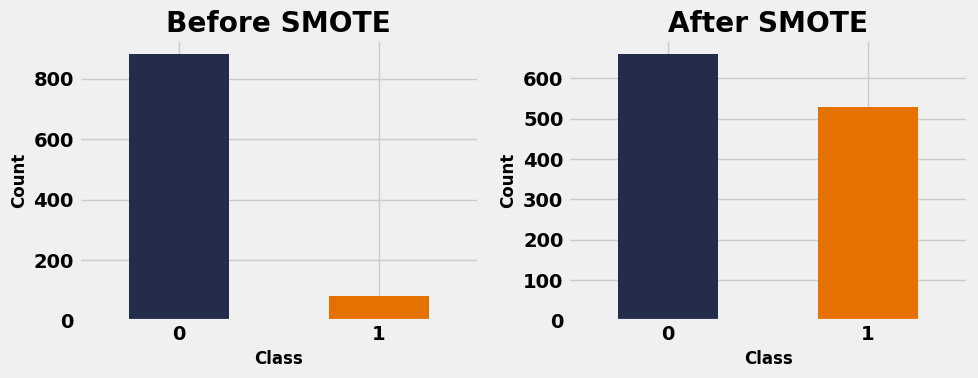

In [44]:
# Visualize change in class imbalance
plt.figure(figsize=(10, 4))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
old_class_counts.plot(kind='bar', color=['#232D4B', '#E57200'])
plt.title('Before SMOTE', weight='bold')
plt.xlabel('Class', weight='bold', size=12)
plt.ylabel('Count', weight='bold', size=12)
plt.xticks(rotation=0, weight='bold')  # Make xticks bold
plt.yticks(weight='bold')  # Make yticks bold

plt.subplot(1, 2, 2)
new_class_counts.plot(kind='bar', color=['#232D4B', '#E57200'])
plt.title('After SMOTE', weight='bold')
plt.xlabel('Class', weight='bold', size=12)
plt.ylabel('Count', weight='bold', size=12)
plt.xticks(rotation=0, weight='bold')  # Make xticks bold
plt.yticks(weight='bold')  # Make yticks bold

plt.tight_layout()
plt.show()

In [45]:
# Create DataFrames for train, validation, and test sets
X_train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
X_val_df = pd.DataFrame(X_val, columns=[f'feature_{i}' for i in range(X_val.shape[1])])
X_test_df = pd.DataFrame(X_test, columns=[f'feature_{i}' for i in range(X_test.shape[1])])
y_train_df = pd.DataFrame(y_train, columns=['War'])
y_val_df = pd.DataFrame(y_val, columns=['War'])
y_test_df = pd.DataFrame(y_test, columns=['War'])

# Save train, validation, and test sets as CSV files
X_train_df.to_csv('/content/drive/MyDrive/WordsofWar/X_train.csv', index=False)
X_val_df.to_csv('/content/drive/MyDrive/WordsofWar/X_val.csv', index=False)
X_test_df.to_csv('/content/drive/MyDrive/WordsofWar/X_test.csv', index=False)
y_train_df.to_csv('/content/drive/MyDrive/WordsofWar/y_train.csv', index=False)
y_val_df.to_csv('/content/drive/MyDrive/WordsofWar/y_val.csv', index=False)
y_test_df.to_csv('/content/drive/MyDrive/WordsofWar/y_test.csv', index=False)